In [1]:
import pandas as pd
import json
original = pd.read_json("./yelp_dataset/yelp_academic_dataset_business.json", lines=True)
sample = pd.read_csv("./resources/business_sample.csv")
df = pd.read_csv("./resources/business_clean.csv")
top20a = pd.read_csv("./resources/top20attributes.csv", header=None)
top20c = pd.read_csv("./resources/top20Cats.csv", header=None)
original = original[original['business_id'].isin(sample['business_id'])]

In [2]:
state_map = {}
i = 0
for index, row in df.iterrows():
    if not row.state in state_map:
        state_map[row.state] = i
        i += 1

In [3]:
df['state'] = df['state'].map(state_map, na_action='ignore')
clean = df.drop(['attributes', 'categories'], axis=1)

In [4]:
def parseAttributes(d, attribute):
    if type(d) is not dict:
        return -1
    elif attribute in d:
        if d[attribute] == 'True' or d[attribute] == "u'free'" or d[attribute] == 'free':
            return 1
        if d[attribute] == 'False' or d[attribute] == "u'no'" or d[attribute] == 'no' or d[attribute] == 'None':
            return 0
    else:
        for key in d:
            if attribute in key:
                if key[attribute] == 'True' or key[attribute] == "u'free'" or key[attribute] == 'free':
                    return 1
                if key[attribute] == 'False' or key[attribute] == "u'no'" or key[attribute] == 'no'or key[attribute] == 'None':
                    return 0
    return -1

In [5]:
def parseCategories(d, category):
    if category in d:
        return 1
    else:
        return 0

In [6]:
top20list = top20c[0].tolist()[:20]
for i in range(20):
    top20list[i] = top20list[i].split(':')[0]
top20list

for category in top20list:
    original[category] = original['categories'].apply(lambda x: parseCategories(x, category))
for category in top20list:
    clean[category] = original[category].values

In [7]:
top20list = top20a[0].tolist()
top20list.remove('RestaurantsAttire')
top20list.remove('NoiseLevel')
top20list.remove('BikeParking')
top20list.remove('Ambience')
top20list.remove('RestaurantsGoodForGroups')
top20list.remove('HasTV')
top20list.remove('RestaurantsPriceRange2')
top20list.remove('GoodForMeal')
top20list.remove('Alcohol')
top20list.remove('BusinessParking')

for attribute in top20list:
    original[attribute] = original['attributes'].apply(lambda x: parseAttributes(x, attribute))
for attribute in top20list:
    clean[attribute] = original[attribute].values


In [8]:
clean

,state,stars,review_count,is_open,total_hours,Food,American (Traditional),Sandwiches,Nightlife,Bars,...,RestaurantsTakeOut,RestaurantsDelivery,BusinessAcceptsCreditCards,OutdoorSeating,RestaurantsReservations,GoodForKids,WiFi,Caters,RestaurantsTableService,HappyHour
0,0,2.0,116,0,105.0,1,1,0,0,0,...,1,1,-1,-1,-1,-1,-1,-1,-1,-1
1,1,4.0,276,1,57.0,1,0,1,0,0,...,1,1,1,1,0,1,0,1,-1,-1
2,2,4.5,18,0,0.0,0,0,1,0,0,...,1,1,1,0,0,1,-1,-1,-1,-1
3,3,1.5,28,1,72.5,1,1,0,0,0,...,1,0,1,1,1,1,1,1,1,-1
4,0,4.0,29,1,45.0,1,0,0,0,0,...,1,1,1,1,0,1,-1,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,12,2.5,32,1,68.0,1,0,1,0,0,...,1,1,1,0,0,1,-1,1,-1,-1
196,1,3.5,19,1,75.5,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
197,1,4.5,29,1,22.5,1,0,0,0,0,...,1,-1,1,-1,-1,-1,-1,1,-1,-1
198,2,3.5,44,1,78.5,0,0,0,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

SSE = []
for i in range(3, 6):
    model = KMeans(n_clusters=i, random_state=42)
    model = model.fit(clean)
    score = model.score(clean)
    SSE.append(model.inertia_)
    #print("i:", i, " | inertia:", model.inertia_)
    

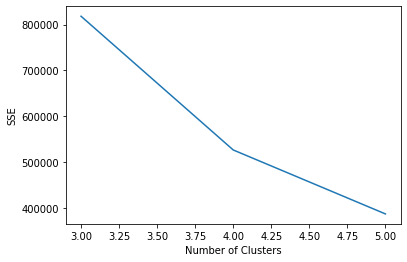

In [10]:
plt.figure()
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.plot(
    range(3, 6),
    SSE,
)
plt.show()

In [11]:
from sklearn.preprocessing import StandardScaler
stand_scaled = StandardScaler().fit_transform(clean)
stand_scaled = pd.DataFrame(stand_scaled)

In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

SSE = []
for i in range(3, 6):
    model = KMeans(n_clusters=i, random_state=42)
    model = model.fit(stand_scaled)
    score = model.score(stand_scaled)
    SSE.append(model.inertia_)
    #print("i:", i, " | inertia:", model.inertia_)
    

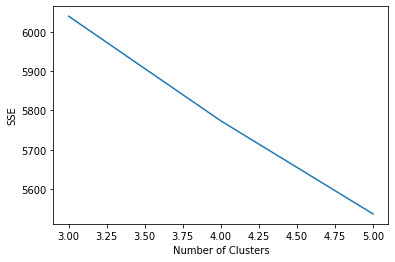

In [13]:
plt.figure()
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.plot(
    range(3, 6),
    SSE,
)
plt.show()

In [14]:
model.labels_

array([4, 1, 1, 1, 4, 2, 2, 0, 0, 0, 0, 3, 3, 2, 0, 2, 3, 0, 0, 0, 2, 0,
       0, 0, 1, 0, 0, 2, 2, 4, 0, 3, 0, 0, 2, 0, 2, 3, 3, 4, 4, 1, 0, 1,
       0, 3, 1, 0, 1, 0, 0, 0, 3, 0, 0, 2, 0, 4, 1, 1, 2, 0, 0, 2, 2, 0,
       3, 1, 0, 3, 3, 1, 4, 0, 1, 0, 2, 1, 0, 3, 0, 2, 1, 3, 2, 0, 0, 0,
       1, 3, 0, 2, 1, 3, 4, 0, 0, 3, 3, 0, 1, 2, 0, 0, 1, 4, 2, 0, 0, 0,
       0, 3, 2, 4, 0, 3, 0, 1, 1, 0, 2, 0, 1, 1, 0, 0, 3, 0, 0, 0, 4, 4,
       2, 0, 1, 4, 2, 2, 0, 0, 2, 0, 0, 0, 1, 1, 1, 0, 1, 1, 4, 3, 3, 2,
       2, 1, 1, 0, 3, 0, 0, 0, 0, 2, 4, 0, 0, 0, 0, 0, 0, 0, 2, 0, 3, 4,
       2, 3, 1, 2, 4, 2, 0, 1, 0, 1, 0, 0, 3, 0, 0, 0, 0, 4, 3, 4, 0, 2,
       2, 2])

In [15]:
temp = clean
temp['temp'] = model.labels_

In [16]:
temp

,state,stars,review_count,is_open,total_hours,Food,American (Traditional),Sandwiches,Nightlife,Bars,...,RestaurantsDelivery,BusinessAcceptsCreditCards,OutdoorSeating,RestaurantsReservations,GoodForKids,WiFi,Caters,RestaurantsTableService,HappyHour,temp
0,0,2.0,116,0,105.0,1,1,0,0,0,...,1,-1,-1,-1,-1,-1,-1,-1,-1,4
1,1,4.0,276,1,57.0,1,0,1,0,0,...,1,1,1,0,1,0,1,-1,-1,1
2,2,4.5,18,0,0.0,0,0,1,0,0,...,1,1,0,0,1,-1,-1,-1,-1,1
3,3,1.5,28,1,72.5,1,1,0,0,0,...,0,1,1,1,1,1,1,1,-1,1
4,0,4.0,29,1,45.0,1,0,0,0,0,...,1,1,1,0,1,-1,0,0,-1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,12,2.5,32,1,68.0,1,0,1,0,0,...,1,1,0,0,1,-1,1,-1,-1,4
196,1,3.5,19,1,75.5,0,0,0,0,0,...,1,1,1,1,1,1,1,1,0,0
197,1,4.5,29,1,22.5,1,0,0,0,0,...,-1,1,-1,-1,-1,-1,1,-1,-1,2
198,2,3.5,44,1,78.5,0,0,0,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,2


In [17]:
temp.to_csv("./resources/temp.csv", index=False)